In [1]:
import numpy as np 
import pandas as pd 

import requests


# Covid19 Cases per counties: 10 counties per top top ten states.

In [2]:
county_covid19_data= pd.read_csv('covid19_top10.csv', index_col=0)
county_covid19_data.rename(columns= {'State': 'STATE'}, inplace= True)
print(county_covid19_data.shape)
county_covid19_data.head(3)


(100, 3)


,County,cases,STATE
0,Los Angeles County,536258.0,CA
1,San Bernardino County,137548.0,CA
2,Riverside County,131822.0,CA


# Counties with respective Cities and GEOID's

In [3]:
places_df= pd.read_csv('census_national_places_counties1.txt', delimiter= '|', dtype= object, )
places_df.head(3)

,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,COUNTY
0,AL,01,00100,Abanda CDP,Census Designated Place,S,Chambers County
1,AL,01,00124,Abbeville city,Incorporated Place,A,Henry County
2,AL,01,00460,Adamsville city,Incorporated Place,A,Jefferson County


In [4]:
places_df1= places_df
places_df1.rename(columns={'COUNTY': 'County'}, inplace= True)


for i in places_df1:
    places_df1['GEOID']= places_df1['STATEFP'] + places_df1['PLACEFP']

print(places_df1.shape)
places_df1.head()

(41414, 8)


,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,County,GEOID
0,AL,01,00100,Abanda CDP,Census Designated Place,S,Chambers County,0100100
1,AL,01,00124,Abbeville city,Incorporated Place,A,Henry County,0100124
2,AL,01,00460,Adamsville city,Incorporated Place,A,Jefferson County,0100460
3,AL,01,00484,Addison town,Incorporated Place,A,Winston County,0100484
4,AL,01,00676,Akron town,Incorporated Place,A,Hale County,0100676


# Census Population Estimates

In [5]:
my_dic= {'STATE': object, 'COUNTY': object,'PLACE': object}
pop_est= pd.read_csv('Population_Es (1).csv', usecols= {'SUMLEV', 'STATE', 'COUNTY', 'PLACE', 'COUSUB', 'CONCIT', 'FUNCSTAT', 'NAME', 'STNAME', 'POPESTIMATE2019'}, dtype= my_dic)


# Creates a list of index where Place== 0, and County not equal to 0. Meaning any value that is not a city/town 

a= pop_est[pop_est['PLACE']== '0'].index
b= pop_est[pop_est['COUNTY']!= '0'].index


index_values= list(a)+ list(b)
index_values= list(dict.fromkeys(index_values))

pop_est_df= pop_est.drop(index= index_values)

print(pop_est_df.shape)
pop_est_df.head()

(19617, 10)


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,FUNCSTAT,NAME,STNAME,POPESTIMATE2019
1,162,1,0,124,0,0,A,Abbeville city,Alabama,2560
2,162,1,0,460,0,0,A,Adamsville city,Alabama,4281
3,162,1,0,484,0,0,A,Addison town,Alabama,718
4,162,1,0,676,0,0,A,Akron town,Alabama,328
5,162,1,0,820,0,0,A,Alabaster city,Alabama,33487


# Creating a column to have uniform GEOIDS accross datasets

In [6]:
new_state= []
new_cty= []

for i in pop_est_df['STATE']:                       
    if len (i)< 2:
        nv='0'+ i
    else:
        nv= i


    new_state.append(nv)
    
pop_est_df['STATEFP']= new_state

for j in pop_est_df['PLACE']:
    if len(j) <5:
        dif=(5-len(j)) * '0'
        n=dif+j
        
    else:
        n= j
        
       
    new_cty.append(n)
        
pop_est_df['PLACEFP']= new_cty
pop_est_df['GEOID']=pop_est_df['STATEFP'] + pop_est_df['PLACEFP']
print(pop_est_df.shape)
pop_est_df.tail(3)       

(19617, 13)


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,FUNCSTAT,NAME,STNAME,POPESTIMATE2019,STATEFP,PLACEFP,GEOID
81285,162,56,0,84925,0,0,A,Worland city,Wyoming,5024,56,84925,5684925
81286,162,56,0,85015,0,0,A,Wright town,Wyoming,1753,56,85015,5685015
81287,162,56,0,86665,0,0,A,Yoder town,Wyoming,154,56,86665,5686665


In [7]:
pop_est_df1= pop_est_df.drop_duplicates(subset= 'GEOID' , keep='first')
print(pop_est_df1.shape)

(19502, 13)


# Merging Covid19 Dataset with Counties and their cities Dataset

In [8]:
counties_df= pd.merge(county_covid19_data, places_df1, on= ['STATE', 'County'])
print(counties_df.shape)
counties_df.tail()

(4144, 9)


,County,cases,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,GEOID
4139,Monroe County,25643.0,NY,36,70189,Spencerport village,Incorporated Place,A,3670189
4140,Monroe County,25643.0,NY,36,72455,Sweden town,County Subdivision,A,3672455
4141,Monroe County,25643.0,NY,36,78960,Webster village,Incorporated Place,A,3678960
4142,Monroe County,25643.0,NY,36,78971,Webster town,County Subdivision,A,3678971
4143,Monroe County,25643.0,NY,36,81402,Wheatland town,County Subdivision,A,3681402


# Remove duplicates after merging Covid19 dataframe and Dataframe with cities and counties

In [9]:
ccs= counties_df
ccs= ccs.drop_duplicates(subset= 'GEOID', keep='first')
print(ccs.shape)
ccs.head()


(3632, 9)


,County,cases,STATE,STATEFP,PLACEFP,PLACENAME,TYPE,FUNCSTAT,GEOID
0,Los Angeles County,536258.0,CA,06,00212,Acton CDP,Census Designated Place,S,0600212
1,Los Angeles County,536258.0,CA,06,00394,Agoura Hills city,Incorporated Place,A,0600394
2,Los Angeles County,536258.0,CA,06,00450,Agua Dulce CDP,Census Designated Place,S,0600450
3,Los Angeles County,536258.0,CA,06,00884,Alhambra city,Incorporated Place,A,0600884
4,Los Angeles County,536258.0,CA,06,01150,Alondra Park CDP,Census Designated Place,S,0601150


In [10]:
ccs['TYPE'].value_counts()

County Subdivision         1247
Incorporated Place         1205
Census Designated Place    1180
Name: TYPE, dtype: int64

# Drop Census Designated Places: 
### the statistical counterparts of incorporated places, and are delineated to provide data for settled concentrations of population that are identifiable by name but are not legally incorporated.

In [11]:
ccs_df= (ccs[ccs['TYPE']!= 'Census Designated Place']).reset_index(drop= True)
ccs_df.drop(index=ccs_df[ccs_df['PLACENAME']== 'County Subdivisions not defined'].index, inplace= True)
print(ccs_df.shape)

(2449, 9)


# Merging Datasets with Cities and their populations with Dataset of Covid and Cities

In [12]:
result= pd.merge(ccs_df, pop_est_df1, on= 'GEOID')
print(result.shape)
result.head(3)

(1710, 21)


,County,cases,STATE_x,STATEFP_x,PLACEFP_x,PLACENAME,TYPE,FUNCSTAT_x,GEOID,SUMLEV,...,COUNTY,PLACE,COUSUB,CONCIT,FUNCSTAT_y,NAME,STNAME,POPESTIMATE2019,STATEFP_y,PLACEFP_y
0,Los Angeles County,536258.0,CA,06,00394,Agoura Hills city,Incorporated Place,A,0600394,162,...,0,394,0,0,A,Agoura Hills city,California,20222,06,00394
1,Los Angeles County,536258.0,CA,06,00884,Alhambra city,Incorporated Place,A,0600884,162,...,0,884,0,0,A,Alhambra city,California,83750,06,00884
2,Los Angeles County,536258.0,CA,06,02462,Arcadia city,Incorporated Place,A,0602462,162,...,0,2462,0,0,A,Arcadia city,California,57939,06,02462


In [13]:
result_df= result.drop(columns= {'STATE_x', 'STATEFP_x', 'PLACEFP_x', 'PLACENAME', 'SUMLEV', 'COUSUB', 'CONCIT', 'FUNCSTAT_y','STATEFP_y', 'PLACEFP_y', 'COUNTY', 'FUNCSTAT_x', 'STATE_y','PLACE'})


In [14]:
result_df= result_df[['NAME', 'County', 'STNAME','TYPE','GEOID', 'POPESTIMATE2019', 'cases', ]]

result_df.head(3)

,NAME,County,STNAME,TYPE,GEOID,POPESTIMATE2019,cases
0,Agoura Hills city,Los Angeles County,California,Incorporated Place,0600394,20222,536258.0
1,Alhambra city,Los Angeles County,California,Incorporated Place,0600884,83750,536258.0
2,Arcadia city,Los Angeles County,California,Incorporated Place,0602462,57939,536258.0


# Add Dataset with city Latitude and Longitude

In [15]:
my_dict= {'GEOID': object}
coords= pd.read_csv('Places_cities_coordinates.txt',delimiter= '\t',encoding= 'utf-8', dtype= my_dict )
coords.drop(columns=['ANSICODE', 'LSAD', 'FUNCSTAT', 'ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI'], inplace= True)
coords.shape

(29574, 5)

In [16]:
coords.rename(columns={'INTPTLAT': 'LAT', 'INTPTLONG                                                                                                 ':'LONG'}, inplace= True)
# coords['LONG']= (coords['LONG'])*-1


# Merging results dataframe with Census Latitude and Longitude dataframe

In [17]:
results_df= pd.merge(result_df, coords, on=['GEOID'])
print(results_df.shape)
results_df.head()

(1710, 11)


,NAME_x,County,STNAME,TYPE,GEOID,POPESTIMATE2019,cases,USPS,NAME_y,LAT,LONG
0,Agoura Hills city,Los Angeles County,California,Incorporated Place,0600394,20222,536258.0,CA,Agoura Hills city,34.148942,-118.763930
1,Alhambra city,Los Angeles County,California,Incorporated Place,0600884,83750,536258.0,CA,Alhambra city,34.083571,-118.136444
2,Arcadia city,Los Angeles County,California,Incorporated Place,0602462,57939,536258.0,CA,Arcadia city,34.132689,-118.036347
3,Artesia city,Los Angeles County,California,Incorporated Place,0602896,16601,536258.0,CA,Artesia city,33.867593,-118.080635
4,Avalon city,Los Angeles County,California,Incorporated Place,0603274,3681,536258.0,CA,Avalon city,33.343335,-118.317615


In [18]:
results_df.rename(columns={'NAME_y': 'NAME', 'USPS': 'STATE'}, inplace= True)
results_df=results_df[['NAME', 'County', 'STNAME', 'STATE', 'TYPE', 'GEOID', 'POPESTIMATE2019', 'cases', 'LAT', 'LONG']]
results_df.shape

(1710, 10)

In [19]:
results_df.head(2)

,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG
0,Agoura Hills city,Los Angeles County,California,CA,Incorporated Place,0600394,20222,536258.0,34.148942,-118.763930
1,Alhambra city,Los Angeles County,California,CA,Incorporated Place,0600884,83750,536258.0,34.083571,-118.136444


In [20]:
sorted_df= results_df.sort_values(by= ['STATE', 'cases', 'POPESTIMATE2019'],ascending= False, ignore_index= True)

sorted_df.head(3)

,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG
0,West Allis city,Milwaukee County,Wisconsin,WI,County Subdivision,5585300,59890,79396.0,43.007186,-88.028986
1,Wauwatosa city,Milwaukee County,Wisconsin,WI,County Subdivision,5584675,48118,79396.0,43.063165,-88.035583
2,Greenfield city,Milwaukee County,Wisconsin,WI,County Subdivision,5531175,37221,79396.0,42.960604,-88.005670


# New dataset containing top 6 rows with highest cases and population per county

In [21]:
grouped= sorted_df.groupby(['STATE', 'County'])
df1=grouped.head(6)
df1.reset_index(drop=True, inplace= True)
df1.head()


,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG
0,West Allis city,Milwaukee County,Wisconsin,WI,County Subdivision,5585300,59890,79396.0,43.007186,-88.028986
1,Wauwatosa city,Milwaukee County,Wisconsin,WI,County Subdivision,5584675,48118,79396.0,43.063165,-88.035583
2,Greenfield city,Milwaukee County,Wisconsin,WI,County Subdivision,5531175,37221,79396.0,42.960604,-88.005670
3,Oak Creek city,Milwaukee County,Wisconsin,WI,County Subdivision,5558800,36325,79396.0,42.880257,-87.900777
4,Franklin city,Milwaukee County,Wisconsin,WI,County Subdivision,5527300,35811,79396.0,42.883879,-88.011548


In [22]:
df1.shape

(513, 10)

In [23]:
cities_list= df1['NAME']+ df1['STNAME']
cities_list_csv= cities_list.to_csv('cities_list', index= False)


In [24]:
hhs_df= pd.read_csv('householdSize.csv', dtype= object)
hhs_df.rename(columns= {'FIPS': 'GEOID'}, inplace= True)
hhs_df.head()

,GEOID,Persons per Household
0,5585300,2.17
1,5584675,2.33
2,5531175,2.18
3,5558800,2.45
4,5527300,2.44


In [25]:
print(df1.shape)
hhs_df.shape

(513, 10)


(513, 2)

## Merging Household averaze size/Persons per Household datawith df1 which contains top values Covid-19 cases as well as population per county per state

In [26]:
df2= pd.merge(df1, hhs_df, on=['GEOID'])
print(df2.shape)
df2.head(3)

(447, 11)


,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household
0,West Allis city,Milwaukee County,Wisconsin,WI,County Subdivision,5585300,59890,79396.0,43.007186,-88.028986,2.17
1,Wauwatosa city,Milwaukee County,Wisconsin,WI,County Subdivision,5584675,48118,79396.0,43.063165,-88.035583,2.33
2,Greenfield city,Milwaukee County,Wisconsin,WI,County Subdivision,5531175,37221,79396.0,42.960604,-88.005670,2.18


In [27]:
df2['STATE'].value_counts()

CA    60
TX    53
OH    49
IL    47
WI    47
PA    47
MI    39
FL    38
GA    37
NY    30
Name: STATE, dtype: int64

## When merging df1 and hhs_df we lose 4 rows. The reason for this  is because when webscraping census data there were 4 cities that did not return any value. Not present in the data

In [28]:
df2[df2.isna().any(axis=1)]        # This line finds rows with NaN values. I saw it when I did outer merge. 

,NAME,County,STNAME,STATE,TYPE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household


## Our data comes down to 175 rows 

# Analysis with folium and Four Square

In [29]:
import numpy as np 
import matplotlib.cm as cm 
import matplotlib.colors as colors 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
import folium 
import geocoder 

In [30]:
address = 'United States'

geolocator = Nominatim(user_agent="to_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of United States are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of United States are 39.7837304, -100.4458825.


In [31]:
# create map of US using latitude and longitude values
map_US = folium.Map(location=[latitude,longitude], zoom_start=4)

# add markers to map
for LAT,LONG, NAME, STATE in zip(df2['LAT'], df2['LONG'], df2['NAME'], df2['STATE']):
    label = '{}, {}'.format(NAME,  STATE)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [LAT,LONG],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
map_US

# Four Square Credentials

In [32]:
# Four Square Credentials 


CLIENT_ID= 'C3F0T21YZ5CIOP2OTOQJB0ZGBVVOWWT1UZKF3KPE1ISNEMGG'

CLIENT_SECRET= 'B0H1KRQVEGTXNQW2CJUAZMYCNWVW2PHICNWEAVIKIVHWPSVZ'

VERSION = '20180605' # Foursquare API version
LIMIT = 550 # A default Foursquare API limit 



## EXPLORING Comunities/Cities most affected by Covid-19

In [33]:


def getNearbyVenues(NAME, LAT, LONG, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(NAME, LAT, LONG):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        out = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in out])


# Create dataframe        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
venue_list= getNearbyVenues(NAME=df2['NAME'], LAT=df2['LAT'], LONG=df2['LONG'])

West Allis city
Wauwatosa city
Greenfield city
Oak Creek city
Franklin city
South Milwaukee city
Waukesha city
New Berlin city
Brookfield city
Menomonee Falls village
Muskego city
Oconomowoc city
Madison city
Sun Prairie city
Fitchburg city
Middleton city
Waunakee village
Verona city
Green Bay city
Green Bay city
Ashwaubenon village
Bellevue village
Allouez village
Suamico village
Racine city
Racine city
Caledonia village
Sturtevant village
Waterford village
Kaukauna city
Little Chute village
Kimberly village
Kimberly village
Oshkosh city
Neenah city
Kenosha city
Pleasant Prairie village
Twin Lakes village
Bristol village
Janesville city
Beloit city
Milton city
Evansville city
Wausau city
Weston village
Kronenwetter village
Kronenwetter village
Pasadena city
La Porte city
Deer Park city
Bellaire city
South Houston city
Humble city
Irving city
DeSoto city
Farmers Branch city
Lancaster city
Duncanville city
Balch Springs city
Arlington city
North Richland Hills city
Euless city
Bedford c

In [35]:
print(venue_list.shape)
venue_list.head()

(3700, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West Allis city,43.007186,-88.028986,Chef Paz Restaurant,43.005368,-88.025799,Peruvian Restaurant
1,West Allis city,43.007186,-88.028986,Scooter's Tap,43.006135,-88.025220,Bar
2,West Allis city,43.007186,-88.028986,Fourth-N-Long,43.006532,-88.023911,Sports Bar
3,West Allis city,43.007186,-88.028986,J.Beans Pub,43.005606,-88.025669,Pub
4,West Allis city,43.007186,-88.028986,Speedway,43.005200,-88.026330,Gas Station


In [36]:
venue_list.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Acworth city,6,6,6,6,6,6
Addison village,5,5,5,5,5,5
Akron city,33,33,33,33,33,33
Allen city,5,5,5,5,5,5
Allentown city,4,4,4,4,4,4
...,...,...,...,...,...,...
Yeadon borough,3,3,3,3,3,3
Yonkers city,15,15,15,15,15,15
York city,39,39,39,39,39,39


In [37]:
print('There are {} uniques categories.'.format(len(venue_list['Venue Category'].unique())))

There are 349 uniques categories.


In [38]:
# Analyze each city

# one hot encoding
onehot_df = pd.get_dummies(venue_list[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot_df['City'] = venue_list['City'] 

# move neighborhood column to the first column
# Rearrange columns order

cols = list(onehot_df.columns.values)
cols.remove('City')


cols.insert(0, 'City')

onehot_df=onehot_df[cols]
print(onehot_df.shape)
onehot_df.head(3)



(3700, 350)


,City,ATM,Accessories Store,Advertising Agency,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,West Allis city,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,West Allis city,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,West Allis city,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#  Frequency of occurrences by city

grouped_df = onehot_df.groupby('City').mean().reset_index()
grouped_df.head(3)

,City,ATM,Accessories Store,Advertising Agency,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Amphitheater,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Acworth city,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Addison village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Akron city,0.0,0.0,0.0,0.0,0.0,0.0,0.030303,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
grouped_df.shape

(388, 350)

# Top venues

In [41]:

grouped_df['City']

0         Acworth city
1      Addison village
2           Akron city
3           Allen city
4       Allentown city
            ...       
383     Yeadon borough
384       Yonkers city
385          York city
386     Ypsilanti city
387       Zeeland city
Name: City, Length: 388, dtype: object

In [42]:
num_top_venues = 10

for c in grouped_df['City']:
    print("----"+c+"----")
    temp = grouped_df[grouped_df['City'] == c].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

             Opera House  0.00
8                   Office  0.00
9  North Indian Restaurant  0.00


----Sugar Hill city----
                           venue  freq
0                     Vape Store   1.0
1                            ATM   0.0
2  Paper / Office Supplies Store   0.0
3              Other Repair Shop   0.0
4           Other Great Outdoors   0.0
5                   Optical Shop   0.0
6                    Opera House   0.0
7                         Office   0.0
8        North Indian Restaurant   0.0
9                 Nightlife Spot   0.0


----Sun Prairie city----
                  venue  freq
0           Pizza Place  0.10
1   Japanese Restaurant  0.05
2   Arts & Crafts Store  0.05
3           Gas Station  0.05
4                  Food  0.05
5            Beer Store  0.05
6    Mexican Restaurant  0.05
7           Cheese Shop  0.05
8  Fast Food Restaurant  0.05
9        Shipping Store  0.05


----Sunnyvale city----
                                      venue  freq
0               

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
    

In [44]:
# Top venues into a dataframe

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['City'] = grouped_df['City']

for ind in np.arange(grouped_df.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped_df.iloc[ind, :], num_top_venues)

venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acworth city,Beach,BBQ Joint,Park,Martial Arts School,Trail
1,Addison village,Business Service,Bank,Electronics Store,Bar,Gas Station
2,Akron city,Bar,Coffee Shop,Thai Restaurant,Bank,Sandwich Place
3,Allen city,Hotel,Bowling Alley,Breakfast Spot,Pharmacy,Fireworks Store
4,Allentown city,Racetrack,Brewery,Baseball Field,Hobby Shop,Fireworks Store


In [45]:
venues_sorted.shape

(388, 6)

## For georgraphical/top venues data 


In [46]:
import matplotlib.pyplot as  plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# from sklearn.preprocessing import StandardScaler, normalize

In [47]:
grouped_venues_clustering = grouped_df.drop('City', 1)

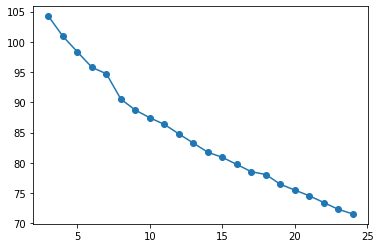

In [48]:
# 2nd style:

cluster_range= list(range(3,25))
inertias= []                # How far away the points within a cluster are. We look for small inertia values


#init: Initialization method of the centroids. Value will be: "k-means++". k-means++ selects initial cluster centers for k-means clustering in a smart way to speed up convergence.        

for c in cluster_range:
    k_means= KMeans(init= 'k-means++', n_clusters= c, n_init= 50, random_state= 0).fit(grouped_venues_clustering)                                                                                                                                             
    inertias.append(k_means.inertia_)

plt.figure()
plt.plot(cluster_range, inertias, marker= 'o')
plt.show()



In [49]:

# set number of clusters
kclusters = 14



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 9])

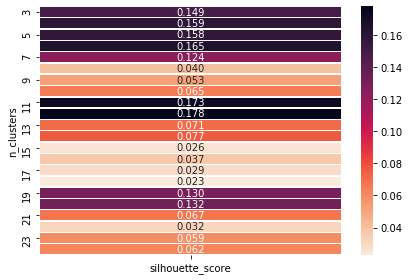

In [50]:
from sklearn.metrics import silhouette_samples,silhouette_score


cluster_range
sil_results= []
 
for c in cluster_range:
    clusterer= KMeans(init= 'k-means++', n_clusters= c, n_init= 50, random_state= 0)
    cluster_labels= clusterer.fit_predict(grouped_venues_clustering)
    sil_avg= silhouette_score(grouped_venues_clustering, cluster_labels)
    sil_results.append([c,sil_avg])


df_res= pd.DataFrame(sil_results, columns=['n_clusters', 'silhouette_score'])
pivot_km= pd.pivot_table(df_res, index= 'n_clusters', values= 'silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt= '.3f', cmap= sns.cm.rocket_r)
plt.tight_layout()

In [51]:
kmeans.labels_

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  9,  6,  6,  6,  7, 10, 11,  6,
        6, 13,  6,  4,  6,  6,  3,  6,  6,  6,  6,  6,  6,  6,  3,  6, 10,
        6,  6,  3,  2, 10,  6,  9,  1,  6,  6,  6, 10,  7,  6,  6,  6,  6,
        6,  0,  6,  6,  6, 12,  3,  6,  6,  6,  6,  6,  9,  6,  3,  6,  6,
        4,  6,  6,  3, 13,  6,  6,  6, 10,  6,  5,  6,  6,  6,  6,  6,  6,
        3,  6,  6, 10,  6,  6,  1,  6,  6,  6,  9,  6,  6,  6,  6, 10,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  3,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  3,  6,  4,  6,  4,  6,  6,  4,  6, 12,  6,  6,
        6,  6,  6,  1,  8,  3,  6,  6,  6,  6,  6,  7,  6,  6,  6,  6,  6,
        6,  2,  3,  6,  6,  6,  0,  8,  6,  6,  6,  4,  6,  6,  6,  6,  6,
       10,  4,  6,  6, 13,  6,  3,  3, 12,  6,  6,  8,  6,  6,  6,  6,  6,
        6,  6,  6,  1,  6,  6,  6, 10,  6,  6,  6,  5,  3,  6,  6,  3,  6,
        3,  6,  6,  4,  6,  6,  6, 12,  6,  9,  0,  6,  6,  6,  6,  6,  6,
        6,  3,  6,  6,  6

# Add clustering labels

In [52]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df2[['NAME', 'County', 'STATE', 'GEOID', 'POPESTIMATE2019', 'cases','LAT', 'LONG','Persons per Household']]
df_merged.rename(columns= {'NAME': 'City'}, inplace= True)


In [53]:
# merge data to add latitude/longitude for each 
df_merged = df_merged.merge(venues_sorted, on='City')

df_merged.head(3) # check the last columns!

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,West Allis city,Milwaukee County,WI,5585300,59890,79396.0,43.007186,-88.028986,2.17,6,Bar,Pub,Pharmacy,Spa,Furniture / Home Store
1,Wauwatosa city,Milwaukee County,WI,5584675,48118,79396.0,43.063165,-88.035583,2.33,5,Park,Gym,Pool,Zoo Exhibit,Financial or Legal Service
2,Greenfield city,Milwaukee County,WI,5531175,37221,79396.0,42.960604,-88.005670,2.18,6,Italian Restaurant,Jewelry Store,Ice Cream Shop,Restaurant,Beer Bar


# Clusters for georgraphical venues data

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['LAT'], df_merged['LONG'], df_merged['City'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [55]:
df_merged['Cluster Labels'].value_counts()

6     286
3      35
4      13
10     10
9       9
12      8
13      7
5       7
1       7
0       7
2       5
7       4
8       3
11      2
Name: Cluster Labels, dtype: int64

## Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


## Cluster 0

In [56]:
df_merged.loc[df_merged['Cluster Labels'] == 0]                 


,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
30,Neenah city,Winnebago County,WI,5555750,26300,14427.0,44.167597,-88.475999,2.35,0,Hotel,Golf Course,American Restaurant,Zoo Exhibit,Fireworks Store
174,North Canton city,Stark County,OH,3956294,17176,17089.0,40.874156,-81.397098,2.22,0,American Restaurant,Park,Clothing Store,Gym / Fitness Center,Mexican Restaurant
251,Cicero town,Cook County,IL,1714351,80796,171828.0,41.844537,-87.759290,3.65,0,Liquor Store,Chinese Restaurant,American Restaurant,Grocery Store,Financial or Legal Service
270,North Chicago city,Lake County,IL,1753559,29615,44099.0,42.316696,-87.859201,2.71,0,American Restaurant,Credit Union,Greek Restaurant,Fast Food Restaurant,Discount Store
287,McHenry city,McHenry County,IL,1745694,27061,17023.0,42.339504,-88.293010,2.61,0,Golf Course,Zoo Exhibit,French Restaurant,Exhibit,Eye Doctor
368,Irvine city,Orange County,CA,0636770,287401,112893.0,33.678399,-117.771254,2.70,0,Trail,Golf Course,American Restaurant,Zoo Exhibit,Fireworks Store
379,Wasco city,Kern County,CA,0683542,28710,52002.0,35.593787,-119.367098,3.62,0,American Restaurant,Zoo Exhibit,Fish & Chips Shop,Eye Doctor,Fabric Shop


## Cluster 1

In [57]:
df_merged.loc[df_merged['Cluster Labels'] == 1]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
71,Edinburg city,Hidalgo County,TX,4822660,101170,48009.0,26.321056,-98.162837,3.24,1,Food,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
164,Hamilton city,Butler County,OH,3933012,62082,22488.0,39.393428,-84.565754,2.44,1,Travel & Transport,Food,Diner,Food Service,Financial or Legal Service
179,Lebanon city,Warren County,OH,3942364,20659,13156.0,39.423069,-84.219695,2.55,1,Bakery,Food,Zoo Exhibit,Fireworks Store,Eye Doctor
182,Canfield city,Mahoning County,OH,3911360,7176,12458.0,41.029879,-80.767322,2.43,1,Trail,Food,Zoo Exhibit,Financial or Legal Service,Exhibit
253,Skokie village,Cook County,IL,1770122,62700,171828.0,42.035970,-87.739994,2.82,1,Golf Course,Food,Zoo Exhibit,Financial or Legal Service,Exhibit
362,Rialto city,San Bernardino County,CA,0660466,103526,137548.0,34.117330,-117.389344,3.94,1,Ice Cream Shop,Fireworks Store,Exhibit,Eye Doctor,Fabric Shop
364,Murrieta city,Riverside County,CA,0650076,116223,131822.0,33.572134,-117.190444,3.49,1,Ice Cream Shop,Food,Fireworks Store,Exhibit,Eye Doctor


## Cluster 2

In [58]:
df_merged.loc[df_merged['Cluster Labels'] == 2]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
41,Weston village,Marathon County,WI,5586025,15167,11133.0,44.891220,-89.549651,2.47,2,Business Service,Zoo Exhibit,Fireworks Store,Eye Doctor,Fabric Shop
103,Quakertown borough,Bucks County,PA,4263048,8784,25496.0,40.439678,-75.345766,2.49,2,Baseball Field,Business Service,Zoo Exhibit,French Restaurant,Eye Doctor
218,Novi city,Oakland County,MI,2659440,60896,50285.0,42.478494,-83.486825,2.54,2,Airport Service,Business Service,Zoo Exhibit,Fireworks Store,Eye Doctor
239,Burton city,Genesee County,MI,2612060,28574,17174.0,43.000745,-83.618151,2.50,2,Business Service,Zoo Exhibit,Fireworks Store,Eye Doctor,Fabric Shop
265,Homer Glen village,Will County,IL,1735835,24472,47257.0,41.605179,-87.952373,2.99,2,Business Service,Zoo Exhibit,Fireworks Store,Eye Doctor,Fabric Shop


## Cluster 3

In [59]:
df_merged.loc[df_merged['Cluster Labels'] == 3]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,Oshkosh city,Winnebago County,WI,5560500,67004,14427.0,44.023168,-88.562260,2.23,3,Gas Station,Harbor / Marina,American Restaurant,Discount Store,River
45,La Porte city,Harris County,TX,4841440,34976,210362.0,29.667413,-95.049139,2.83,3,Campground,Convenience Store,Fireworks Store,Exhibit,Eye Doctor
47,Bellaire city,Harris County,TX,4807300,18971,210362.0,29.704019,-95.460905,2.78,3,Pharmacy,Zoo Exhibit,Elementary School,Exhibit,Eye Doctor
55,Duncanville city,Dallas County,TX,4821628,38751,147591.0,32.645950,-96.913870,2.90,3,Ice Cream Shop,Kids Store,Convenience Store,Exhibit,Eye Doctor
58,North Richland Hills city,Tarrant County,TX,4852356,70670,107721.0,32.862042,-97.214758,2.64,3,Convenience Store,Sandwich Place,Mexican Restaurant,Nail Salon,Gas Station
64,Horizon City city,El Paso County,TX,4834832,19642,93859.0,31.679648,-106.191055,3.54,3,Auto Workshop,Mexican Restaurant,Video Store,Pharmacy,Zoo Exhibit
65,Converse city,Bexar County,TX,4816468,28171,79363.0,29.507593,-98.307832,3.47,3,Mexican Restaurant,Convenience Store,Pizza Place,Basketball Stadium,Sandwich Place
72,Mission city,Hidalgo County,TX,4848768,84331,48009.0,26.204060,-98.325221,3.41,3,Convenience Store,Fast Food Restaurant,Thrift / Vintage Store,Mexican Restaurant,Seafood Restaurant
73,Pharr city,Hidalgo County,TX,4857200,79112,48009.0,26.167844,-98.190198,3.53,3,Convenience Store,Snack Place,Gas Station,Fast Food Restaurant,Discount Store
74,Weslaco city,Hidalgo County,TX,4877272,41629,48009.0,26.164998,-97.989281,3.26,3,Mexican Restaurant,Shipping Store,Chinese Restaurant,Zoo Exhibit,Financial or Legal Service


## Cluster 4

In [60]:
df_merged.loc[df_merged['Cluster Labels'] == 4]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Oak Creek city,Milwaukee County,WI,5558800,36325,79396.0,42.880257,-87.900777,2.45,4,Trail,Athletics & Sports,Playground,Fireworks Store,Exhibit
9,Madison city,Dane County,WI,5548000,259680,31108.0,43.087815,-89.429856,2.21,4,Public Art,Trail,Scenic Lookout,Fast Food Restaurant,Event Space
32,Pleasant Prairie village,Kenosha County,WI,5563300,21034,11304.0,42.526679,-87.888302,2.61,4,Candy Store,Trail,Department Store,Gift Shop,Fireworks Store
40,Wausau city,Marathon County,WI,5584475,38561,11133.0,44.961766,-89.646538,2.20,4,Trail,Park,Auto Dealership,College Theater,Fast Food Restaurant
159,Cuyahoga Falls city,Summit County,OH,3919778,49106,23394.0,41.143553,-81.572964,2.21,4,Trail,Health & Beauty Service,Zoo Exhibit,Financial or Legal Service,Exhibit
161,Barberton city,Summit County,OH,3903828,25953,23394.0,41.006903,-81.604390,2.33,4,Trail,Zoo Exhibit,French Restaurant,Exhibit,Eye Doctor
194,Glen Cove city,Nassau County,NY,3629113,27166,73757.0,40.884756,-73.644781,2.70,4,History Museum,Trail,Beach,Fireworks Store,Eye Doctor
234,Kentwood city,Kent County,MI,2642820,51898,38422.0,42.884900,-85.592528,2.52,4,Boutique,Trail,Pool,Tour Provider,Fireworks Store
236,Grandville city,Kent County,MI,2634160,15858,38422.0,42.900514,-85.752086,2.52,4,Trail,Zoo Exhibit,French Restaurant,Exhibit,Eye Doctor
294,Johns Creek city,Fulton County,GA,1342425,84579,43297.0,34.032739,-84.203848,3.00,4,Shop & Service,Trail,Playground,Financial or Legal Service,Event Space


## Cluster 5

In [61]:
df_merged.loc[df_merged['Cluster Labels'] == 5]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Wauwatosa city,Milwaukee County,WI,5584675,48118,79396.0,43.063165,-88.035583,2.33,5,Park,Gym,Pool,Zoo Exhibit,Financial or Legal Service
254,Des Plaines city,Cook County,IL,1719642,58899,171828.0,42.034398,-87.901136,2.58,5,Park,Gym,Track,Zoo Exhibit,Fast Food Restaurant
264,Lockport city,Will County,IL,1744225,25615,47257.0,41.587373,-88.030349,2.87,5,Football Stadium,Pool,Fireworks Store,Exhibit,Eye Doctor
329,Tampa city,Hillsborough County,FL,1271000,399700,80035.0,27.967876,-82.474586,2.47,5,Park,Board Shop,Gym,Deli / Bodega,Scenic Lookout
331,Temple Terrace city,Hillsborough County,FL,1271400,26639,80035.0,28.045199,-82.377866,2.70,5,Pool,Recreation Center,Park,Zoo Exhibit,Financial or Legal Service
345,Tarpon Springs city,Pinellas County,FL,1271150,25577,46860.0,28.149054,-82.779371,2.50,5,Gym,Park,Zoo Exhibit,Financial or Legal Service,Exhibit
384,Folsom city,Sacramento County,CA,0624638,81328,51076.0,38.666597,-121.141635,2.63,5,Gym,Elementary School,Event Space,Exhibit,Eye Doctor


## Cluster 6

In [62]:
df_merged.loc[df_merged['Cluster Labels'] == 6]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,West Allis city,Milwaukee County,WI,5585300,59890,79396.0,43.007186,-88.028986,2.17,6,Bar,Pub,Pharmacy,Spa,Furniture / Home Store
2,Greenfield city,Milwaukee County,WI,5531175,37221,79396.0,42.960604,-88.005670,2.18,6,Italian Restaurant,Jewelry Store,Ice Cream Shop,Restaurant,Beer Bar
4,Franklin city,Milwaukee County,WI,5527300,35811,79396.0,42.883879,-88.011548,2.44,6,Baseball Field,Football Stadium,Bar,Gym,Park
5,Franklin city,Warren County,OH,3928476,11612,13156.0,39.554951,-84.295728,2.34,6,Baseball Field,Football Stadium,Bar,Gym,Park
6,South Milwaukee city,Milwaukee County,WI,5575125,20696,79396.0,42.912643,-87.862312,2.40,6,Bar,Coffee Shop,Ice Cream Shop,Food & Drink Shop,Bowling Alley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Oakland city,Alameda County,CA,0653000,433031,40026.0,37.769846,-122.225690,2.58,6,Gym / Fitness Center,Hardware Store,Bus Station,Zoo Exhibit,Financial or Legal Service
399,Hayward city,Alameda County,CA,0633000,159203,40026.0,37.628659,-122.102405,3.27,6,Vietnamese Restaurant,Baseball Field,Fried Chicken Joint,Laundromat,Park
400,Berkeley city,Alameda County,CA,0606000,121363,40026.0,37.866972,-122.299147,2.39,6,Cosmetics Shop,Furniture / Home Store,Café,Women's Store,Clothing Store
401,Livermore city,Alameda County,CA,0641992,90189,40026.0,37.685467,-121.762518,2.81,6,Ice Cream Shop,Pizza Place,Train Station,Other Repair Shop,Thai Restaurant


## Cluster 7

In [63]:
df_merged.loc[df_merged['Cluster Labels'] == 7]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
69,Helotes city,Bexar County,TX,4833146,9961,79363.0,29.577970,-98.680540,3.42,7,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
167,Toledo city,Lucas County,OH,3977000,272779,22440.0,41.664071,-83.581861,2.27,7,Construction & Landscaping,Cosmetics Shop,Caribbean Restaurant,Cuban Restaurant,Event Space
273,Carpentersville village,Kane County,IL,1711358,37254,37747.0,42.122736,-88.293896,3.53,7,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
380,Arvin city,Kern County,CA,0602924,21851,52002.0,35.194361,-118.830569,4.34,7,Construction & Landscaping,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor


## Cluster 8

In [64]:
df_merged.loc[df_merged['Cluster Labels'] == 8]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
49,Irving city,Dallas County,TX,4837000,239798,147591.0,32.857748,-96.970022,2.80,8,Playground,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor
124,Hanover borough,York County,PA,4232448,15719,18556.0,39.811756,-76.983605,2.25,8,Playground,Hospital,Fish & Chips Shop,Exhibit,Eye Doctor
286,Lake in the Hills village,McHenry County,IL,1741183,28634,17023.0,42.181194,-88.393043,2.97,8,Playground,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor


## Cluster 9

In [65]:
df_merged.loc[df_merged['Cluster Labels'] == 9]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
70,McAllen city,Hidalgo County,TX,4845384,143268,48009.0,26.227378,-98.246871,3.08,9,Pizza Place,Elementary School,Exhibit,Eye Doctor,Fabric Shop
108,Yeadon borough,Delaware County,PA,4286968,11496,25450.0,39.932489,-75.252707,2.48,9,Cupcake Shop,Hookah Bar,Pizza Place,Zoo Exhibit,Fish & Chips Shop
114,Elizabethtown borough,Lancaster County,PA,4223016,11445,23464.0,40.153284,-76.598652,2.31,9,Pizza Place,Candy Store,Exhibit,Eye Doctor,Fabric Shop
115,Columbia borough,Lancaster County,PA,4215384,10355,23464.0,40.034855,-76.495889,2.32,9,Pizza Place,Pharmacy,Park,American Restaurant,Bakery
176,Canal Fulton city,Stark County,OH,3911304,5408,17089.0,40.892302,-81.587930,2.29,9,Pizza Place,Bank,Pharmacy,Discount Store,Financial or Legal Service
211,Webster village,Monroe County,NY,3678960,5667,25643.0,43.216387,-77.421900,2.14,9,Pizza Place,Elementary School,Exhibit,Eye Doctor,Fabric Shop
263,New Lenox village,Will County,IL,1752584,26926,47257.0,41.510022,-87.970002,3.00,9,Pizza Place,Bank,Mexican Restaurant,Fish & Chips Shop,Eye Doctor
307,Powder Springs city,Cobb County,GA,1362524,15758,30800.0,33.865428,-84.682572,2.91,9,Pizza Place,Boutique,Hardware Store,Automotive Shop,Dance Studio
366,Anaheim city,Orange County,CA,0602000,350365,112893.0,33.823599,-118.016329,3.39,9,Pizza Place,Park,BBQ Joint,Financial or Legal Service,Event Space


## Cluster 10

In [66]:
df_merged.loc[df_merged['Cluster Labels'] == 10]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Ashwaubenon village,Brown County,WI,5503425,17161,24770.0,44.479409,-88.087480,2.19,10,Park,Bar,Zoo Exhibit,Event Space,Eye Doctor
22,Caledonia village,Racine County,WI,5511950,25277,16227.0,42.797411,-87.877405,2.49,10,Historic Site,Park,Zoo Exhibit,Exhibit,Eye Doctor
26,Little Chute village,Outagamie County,WI,5544950,12081,15189.0,44.291128,-88.320399,2.30,10,Park,Zoo Exhibit,Elementary School,Exhibit,Eye Doctor
31,Kenosha city,Kenosha County,WI,5539225,99944,11304.0,42.585882,-87.876398,2.53,10,Park,Bowling Alley,Speakeasy,Fireworks Store,Eye Doctor
34,Bristol village,Kenosha County,WI,5509800,5142,11304.0,42.532323,-88.009098,2.52,10,Park,Zoo Exhibit,Elementary School,Exhibit,Eye Doctor
46,Deer Park city,Harris County,TX,4819624,33474,210362.0,29.687279,-95.115897,3.03,10,Park,Trail,Basketball Court,Zoo Exhibit,Financial or Legal Service
216,Rochester Hills city,Oakland County,MI,2669035,74516,50285.0,42.663484,-83.159196,2.53,10,Park,Lake,Zoo Exhibit,Financial or Legal Service,Exhibit
260,Carol Stream village,DuPage County,IL,1711332,39203,55941.0,41.920346,-88.133223,2.82,10,Park,Moving Target,Zoo Exhibit,Financial or Legal Service,Exhibit
296,East Point city,Fulton County,GA,1325720,34875,43297.0,33.671120,-84.473429,2.42,10,Park,Zoo Exhibit,Elementary School,Exhibit,Eye Doctor
374,Escondido city,San Diego County,CA,0622804,151625,111441.0,33.133053,-117.074043,3.16,10,Grocery Store,Park,Zoo Exhibit,Exhibit,Eye Doctor


## Cluster 11

In [67]:
df_merged.loc[df_merged['Cluster Labels'] == 11]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
339,Atlantic Beach city,Duval County,FL,1202400,13872,63743.0,30.339552,-81.396669,2.25,11,Beach,Park,Zoo Exhibit,Event Space,Eye Doctor
340,Neptune Beach city,Duval County,FL,1248100,7259,63743.0,30.312573,-81.393123,2.33,11,Beach,Farmers Market,Zoo Exhibit,Fried Chicken Joint,Eye Doctor


## Cluster 12

In [68]:
df_merged.loc[df_merged['Cluster Labels'] == 12]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Green Bay city,Brown County,WI,5531000,104578,24770.0,44.521542,-87.986568,2.39,12,Bar,Sporting Goods Shop,Mexican Restaurant,Zoo Exhibit,Fish & Chips Shop
16,Green Bay city,Brown County,WI,5531000,104578,24770.0,44.521542,-87.986568,2.39,12,Bar,Sporting Goods Shop,Mexican Restaurant,Zoo Exhibit,Fish & Chips Shop
173,Massillon city,Stark County,OH,3948244,32584,17089.0,40.784483,-81.525216,2.32,12,Bar,Pool,Zoo Exhibit,Fireworks Store,Eye Doctor
202,Lackawanna city,Erie County,NY,3640189,17720,34757.0,42.818424,-78.832769,2.32,12,Bar,Flower Shop,Zoo Exhibit,Fireworks Store,Eye Doctor
213,Troy city,Oakland County,MI,2680700,84092,50285.0,42.583882,-83.145533,2.63,12,Bar,Zoo Exhibit,Fried Chicken Joint,Eye Doctor,Fabric Shop
214,Troy city,Madison County,IL,1776199,10375,18388.0,38.733787,-89.881668,2.47,12,Bar,Zoo Exhibit,Fried Chicken Joint,Eye Doctor,Fabric Shop
280,South Beloit city,Winnebago County,IL,1770590,7624,22350.0,42.484842,-89.027433,2.60,12,Bar,Zoo Exhibit,Fried Chicken Joint,Eye Doctor,Fabric Shop
342,Clearwater city,Pinellas County,FL,1212875,116946,46860.0,27.980289,-82.768166,2.37,12,Construction & Landscaping,Bar,Zoo Exhibit,Fireworks Store,Eye Doctor


## Cluster 13

In [69]:
df_merged.loc[df_merged['Cluster Labels'] == 13]

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Racine city,Racine County,WI,5566000,76760,16227.0,42.725569,-87.814224,2.45,13,Liquor Store,Home Service,Fireworks Store,Exhibit,Eye Doctor
21,Racine city,Racine County,WI,5566000,76760,16227.0,42.725569,-87.814224,2.45,13,Liquor Store,Home Service,Fireworks Store,Exhibit,Eye Doctor
42,Kronenwetter village,Marathon County,WI,5540550,8079,11133.0,44.819893,-89.588673,2.66,13,Home Service,Business Service,Zoo Exhibit,Fireworks Store,Eye Doctor
43,Kronenwetter village,Marathon County,WI,5540550,8079,11133.0,44.819893,-89.588673,2.66,13,Home Service,Business Service,Zoo Exhibit,Fireworks Store,Eye Doctor
50,DeSoto city,Dallas County,TX,4820092,52988,147591.0,32.599349,-96.862941,2.71,13,Home Service,Chinese Restaurant,Discount Store,Zoo Exhibit,Fireworks Store
56,Balch Springs city,Dallas County,TX,4805372,25007,147591.0,32.713904,-96.618062,3.76,13,Home Service,Discount Store,Zoo Exhibit,Fireworks Store,Exhibit
358,San Bernardino city,San Bernardino County,CA,0665000,215784,137548.0,34.141140,-117.294635,3.46,13,Home Service,Zoo Exhibit,Fireworks Store,Exhibit,Eye Doctor


In [70]:
df_merged[df_merged['County']== 'Fulton County']

,City,County,STATE,GEOID,POPESTIMATE2019,cases,LAT,LONG,Persons per Household,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
38,Milton city,Fulton County,GA,1351670,39587,43297.0,34.144325,-84.314188,2.86,6,Cosmetics Shop,Home Service,Café,Gym / Fitness Center,Dive Bar
292,Sandy Springs city,Fulton County,GA,1368516,109452,43297.0,33.931502,-84.368673,2.26,6,Tennis Court,Restaurant,Playground,Fireworks Store,Exhibit
293,Roswell city,Fulton County,GA,1367284,94763,43297.0,34.039453,-84.350946,2.73,6,Cosmetics Shop,Supermarket,Chinese Restaurant,Gas Station,Pizza Place
294,Johns Creek city,Fulton County,GA,1342425,84579,43297.0,34.032739,-84.203848,3.00,4,Shop & Service,Trail,Playground,Financial or Legal Service,Event Space
295,Alpharetta city,Fulton County,GA,1301696,67213,43297.0,34.071054,-84.273056,2.69,6,Clothing Store,New American Restaurant,American Restaurant,Women's Store,Coffee Shop
296,East Point city,Fulton County,GA,1325720,34875,43297.0,33.671120,-84.473429,2.42,10,Park,Zoo Exhibit,Elementary School,Exhibit,Eye Doctor
